# PyTorch Worklfow

Let's explore an example PyTorch end-to-end workflow

Resource:
* Ground truth notebook: https://colab.research.google.com/drive/1_vqLcQiB3xgWHCTjWO5kd38MWzHJMTB7#scrollTo=51Ug7Ug123Ip

* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

In [23]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting model to data (training)",
                      4: "making predictions and evaluating a model",
                      5: "saving and reloading a model",
                      6: "putting it all together"}


what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting model to data (training)',
 4: 'making predictions and evaluating a model',
 5: 'saving and reloading a model',
 6: 'putting it all together'}

In [24]:
import torch
from torch import nn #nn contains all of PyTorch's buildings blocks for neural networks.
import matplotlib.pyplot as plt


#Check PyTorch version
torch.__version__

'2.10.0+cpu'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [25]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

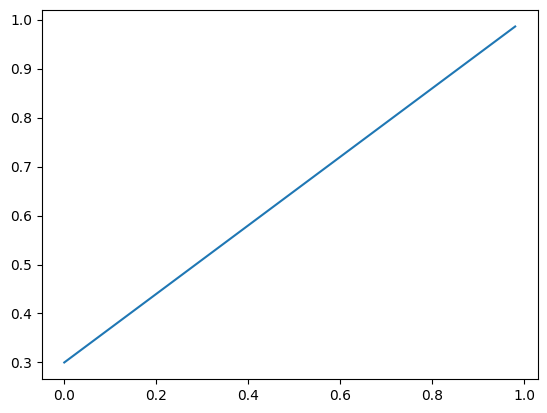

In [26]:
plt.plot(X,y)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)
Let's create a training and test set with our data.

In [27]:
# Create a train/test split
train_split= int(0.8*len(X))
train_split
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visaulize, visualize, visualize!"

In [28]:
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None):

  """Plots training data, test data and compares predictions. """

  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  # Show the legend
  plt.legend(prop={"size": 14})


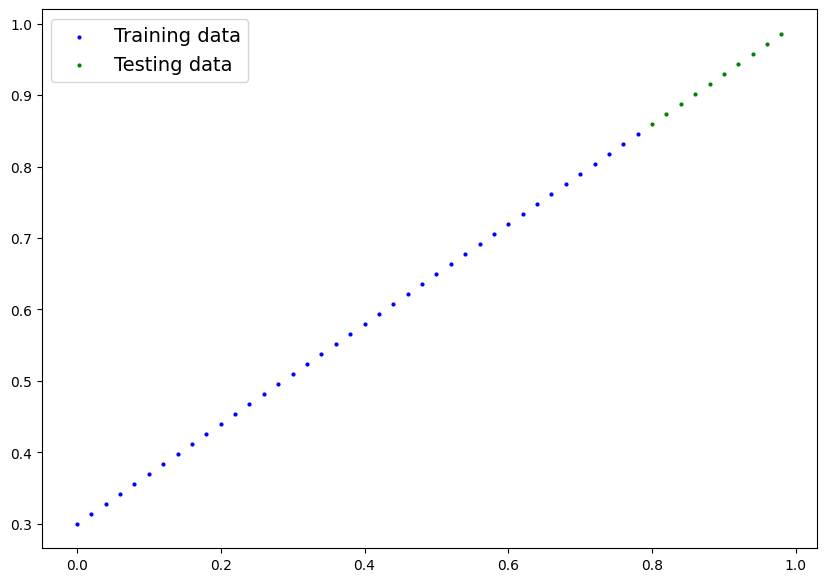

In [29]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

This is very exciting... let's do it!

Resource for learning mroe about OOP in Python: https://realpython.com/python3-object-oriented-programming/

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?
Through two main algorithms:
1. Gradient descent https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation https://www.youtube.com/watch?v=Ilg3gGewQ5U&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=3&pp=iAQB

Neural Network Playlist
https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

In [30]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in Python inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))
    # Forward method to define the computation in the model
  def forward (self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weight * x + self.bias #this is the linear regression formula.

### PyTorch model building essentials
* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational grap)

* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us

* torch.nn.Module - base class for all neural network modules. If you subclass it, you should override forward()

* torch.optim - this is where the optimizers in Python live, they will help with gradient descent.

* def forward() - All nn.Module subclasses require you to overwrite forward(), this method describes what happens in the forward computation.

### Checking the content of our PyTorch model.

Now we've created a model, let's see what's inside..

So we can check our parameters or what's inside our model using .parameters()

In [31]:
# Create a random seed
torch.manual_seed(42)


# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [32]:
# List named paramters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method.



In [33]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [34]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

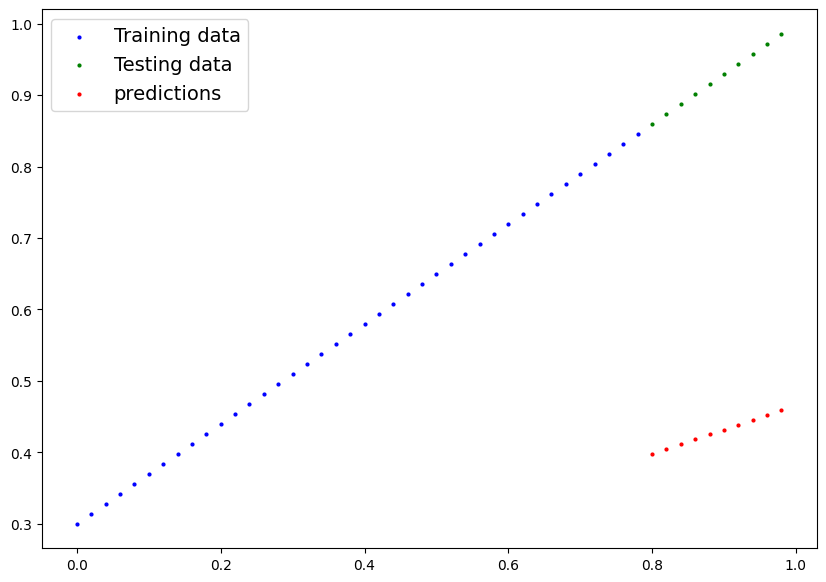

In [35]:
plot_predictions(predictions = y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* paramaters

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong the model's predictions are is to use a loss funciton.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:
* **Loss function** A function to measure how wrong your model's predictions are to the ideal outputs.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.
  * Inside the optimizer you'll often have to set two parameters:
     * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
     * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big / small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes()


And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [36]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [37]:
# Check out our model's paramters ( a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [38]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) #lr = learning rate = possibly the most important hyperparameter that you can set.

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop

0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()` function) - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)





In [39]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [40]:
torch.manual_seed(42)

# An epoch is one loop through the data...(this is a hyperparameter because we've set it ourselves.)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() #train mode in PyTorch sets all parameters that require gradients to require gradients

  #1. Forward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Progress/step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() #turns off different settings in the model not needed for evaulation / testing. (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes not needed for testing
  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

   #Print out model state_dict()
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weight': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict({'weight': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict({'weight': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict({'weight': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict({'weight': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict({'weight': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict({'weight': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Loss: 0.034760899

In [41]:
print(f"Epochs: {epoch_count}\nLoss values: {loss_values}\nTest loss values: {test_loss_values}")
model_0.state_dict(),

Epochs: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
Loss values: [tensor(0.3129, grad_fn=<MeanBackward0>), tensor(0.1977, grad_fn=<MeanBackward0>), tensor(0.0891, grad_fn=<MeanBackward0>), tensor(0.0531, grad_fn=<MeanBackward0>), tensor(0.0454, grad_fn=<MeanBackward0>), tensor(0.0417, grad_fn=<MeanBackward0>), tensor(0.0382, grad_fn=<MeanBackward0>), tensor(0.0348, grad_fn=<MeanBackward0>), tensor(0.0313, grad_fn=<MeanBackward0>), tensor(0.0279, grad_fn=<MeanBackward0>), tensor(0.0245, grad_fn=<MeanBackward0>), tensor(0.0210, grad_fn=<MeanBackward0>), tensor(0.0176, grad_fn=<MeanBackward0>), tensor(0.0142, grad_fn=<MeanBackward0>), tensor(0.0107, grad_fn=<MeanBackward0>), tensor(0.0073, grad_fn=<MeanBackward0>), tensor(0.0039, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>)]
Test loss values: [tensor(0.4811), tensor(0.3464), tensor(0.2173), t

(OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))]),)

In [42]:
import numpy as np

loss_values = np.array(torch.tensor(loss_values).detach().numpy())
test_loss_values = np.array(torch.tensor(test_loss_values).detach().numpy())

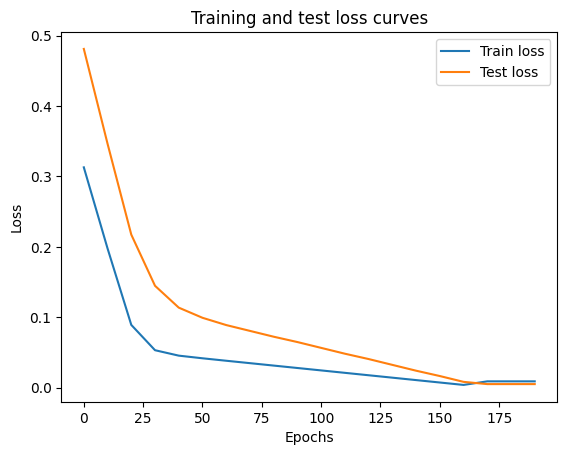

In [43]:
# Plot the loss curves
plt.plot(epoch_count,
         loss_values,
         label="Train loss")
plt.plot(epoch_count,
         test_loss_values,
         label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

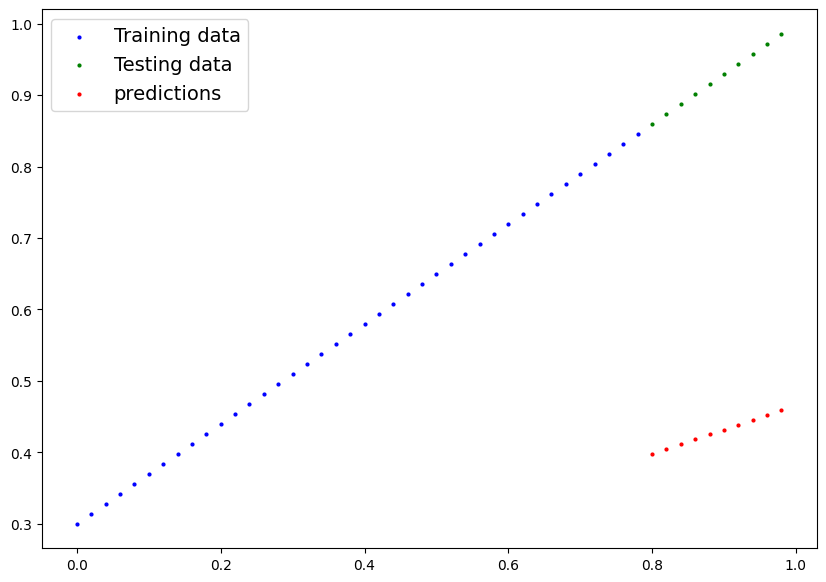

In [44]:
plot_predictions(predictions=y_preds)

In [45]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

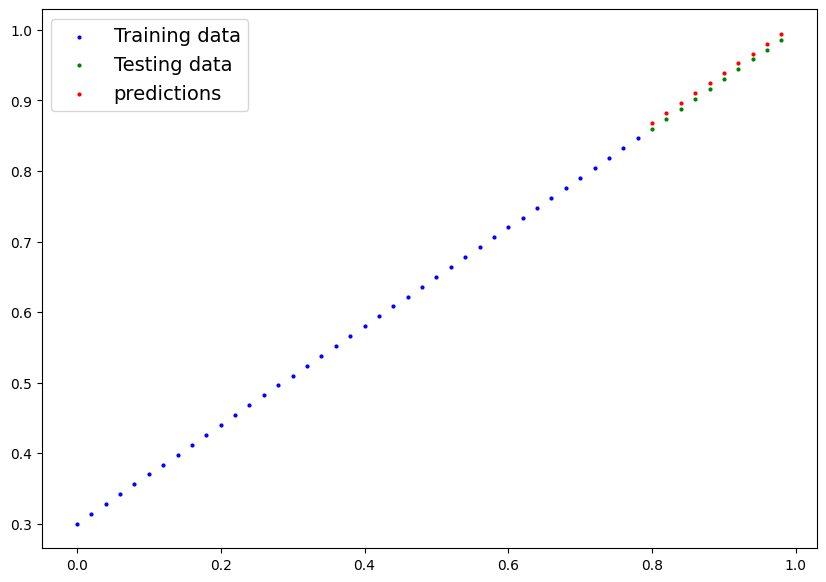

In [46]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

PyTorch save & load code tutorial + extra-curriculum - https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html

In [47]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to:models\01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model,w e'll create a new instance of our model class and load the saved `state_dict()` into that.

In [49]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [50]:
# To load in a saved state_dict we have to instatiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [51]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [52]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [53]:
# Compare loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together

Let's go back through the steps above and see it all in one place.

In [54]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.10.0+cpu'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [55]:
# Setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [56]:
# Create some data using the linear regression formula of y = weight * X + bias

weight = 0.7
bias = 0.3

# Create range values

start = 0
end = 1
step = 0.02

# Create X and y (features and labels)

X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [57]:
# Split the data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [58]:
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None):

  """Plots training data, test data and compares predictions. """

  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  # Show the legend
  plt.legend(prop={"size": 14})


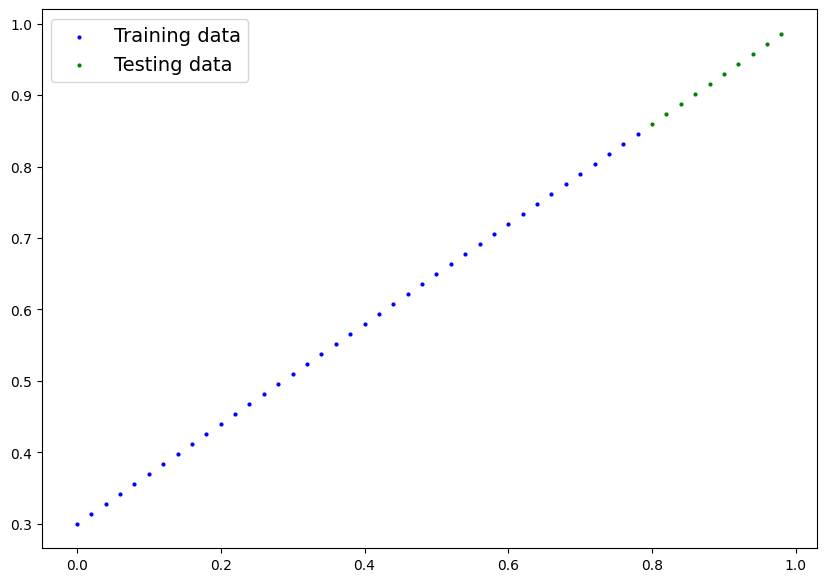

In [59]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error

plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear model

In [60]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

    # Overriding the forward function
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [61]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [62]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training, we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [63]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [64]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss:{loss} | Test Loss: {test_loss} ")

Epoch: 0 | Loss:0.5551779866218567 | Test Loss: 0.5739762187004089 
Epoch: 10 | Loss:0.4399680495262146 | Test Loss: 0.4392663538455963 
Epoch: 20 | Loss:0.3247582018375397 | Test Loss: 0.30455657839775085 
Epoch: 30 | Loss:0.20954827964305878 | Test Loss: 0.16984674334526062 
Epoch: 40 | Loss:0.09433844685554504 | Test Loss: 0.03513689711689949 
Epoch: 50 | Loss:0.023886386305093765 | Test Loss: 0.04784906655550003 
Epoch: 60 | Loss:0.0199567973613739 | Test Loss: 0.04580312222242355 
Epoch: 70 | Loss:0.016517987474799156 | Test Loss: 0.0375305712223053 
Epoch: 80 | Loss:0.013089170679450035 | Test Loss: 0.029944902285933495 
Epoch: 90 | Loss:0.009653178043663502 | Test Loss: 0.02167237363755703 
Epoch: 100 | Loss:0.006215679459273815 | Test Loss: 0.014086711220443249 
Epoch: 110 | Loss:0.002787243574857712 | Test Loss: 0.005814164876937866 
Epoch: 120 | Loss:0.0012645035749301314 | Test Loss: 0.013801807537674904 
Epoch: 130 | Loss:0.0012645035749301314 | Test Loss: 0.013801807537674

In [65]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [66]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [67]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

In [68]:
# Check out our model predictions visually

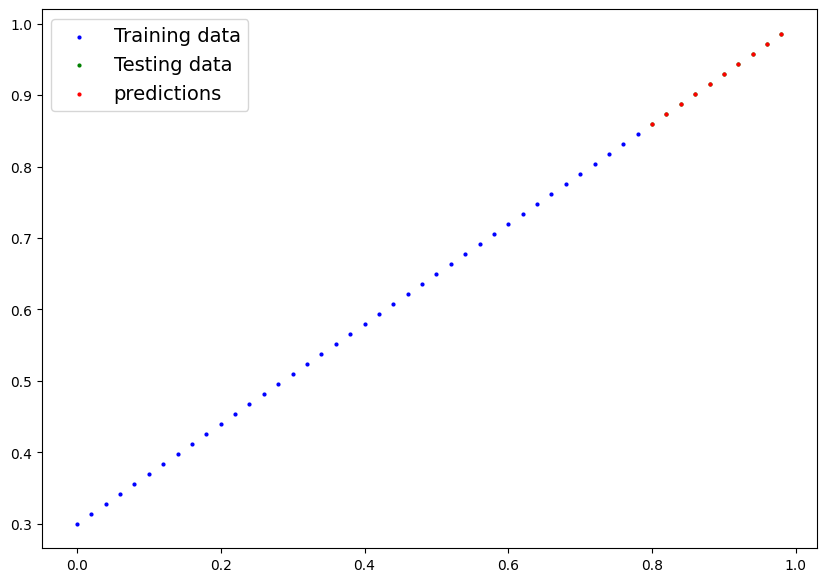

In [69]:
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving & loading a trained model

In [70]:
from pathlib import Path

# 1. Create models directory.
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MDOEL_NAME = "01_pytorch_workflow_model_1.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models\01_pytorch_workflow_model_0.pth


In [71]:
# Load a PyTorch model

# Create a new instance of Linear Regression Model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [72]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [73]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [74]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Excercises & Extra-Curriculum
For extra exercises and extra curriculum: https://www.learnpytorch.io/01_pytorch_workflow/#exercises

